# Импорты и загрузка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import re

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

!pip install pymorphy2
from pymorphy2 import MorphAnalyzer

from wordcloud import WordCloud

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 77.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=e935f935e70bd4de084e85962e3e1b869953e2c874d04363d9e96783b066650d
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [ ]:
path_db = "drive/MyDrive/Career and Education/SBER/DS • ML/Articles proc/db.csv"
db = pd.read_csv(path_db)
db

,id,source,url,title,content,created_at
0,119548,Ru24,https://ru24.net/moscow/368312528/,Восстановлена статуя Христа на кладбище в Лефо...,Восстановлена статуя Христа на кладбище в Лефо...,2023-12-23 23:44:00+00
1,119549,Ru24,https://ru24.net/moscow/368312171/,"Ловчев раскритиковал Федуна за деньги, потраче...",Вместо жены мог бы подумать о болельщиках «Спа...,2023-12-23 23:44:00+00
2,119550,Ru24,https://ru24.net/moscow/368312529/,Сотрудники полиции задержали подозреваемых в м...,Сотрудники полиции задержали подозреваемых в м...,2023-12-23 23:29:00+00
3,119551,Ru24,https://ru24.net/moscow/368312530/,В Измайлове появится новый физкультурно-оздоро...,В Измайлове появится новый физкультурно-оздоро...,2023-12-23 23:29:00+00
4,119552,1prime,https://1prime.ru/macroeconomics/20231224/8426...,Министр обороны Италии призвал к политическому...,"МОСКВА, 24 дек — ПРАЙМ. После почти двух лет к...",2023-12-24 00:25:43+00
...,...,...,...,...,...,...
167383,119542,Tass,https://tass.ru/obschestvo/19617933,В Саратовской области за 3 года ликвидировали ...,Свыше 30 несанкционированных свалок ликвидиров...,2023-12-23 22:34:59+00
167384,119543,Tass,https://tass.ru/nacionalnye-proekty/19616747,Голикова и Мурашко открыли две детские поликли...,"ТАСС, 23 декабря. Две новые детские поликлиник...",2023-12-23 13:40:32+00
167385,119544,Ru24,https://ru24.net/moscow/368312493/,СК: мужчина зарезал девушку и ранил сам себя в...,Мужчина во время ссоры зарезал девушку в кварт...,2023-12-24 00:12:00+00
167386,119545,Ru24,https://ru24.net/moscow/368312473/,Красное море проблем: Россия и Китай опять обо...,| 23 декабря 2023г. – VRUBCOVSKE.RU. Кризис в...,2023-12-24 00:02:00+00


In [ ]:
path_result = "drive/MyDrive/Career and Education/SBER/DS • ML/Articles proc/result.csv"
result = pd.read_csv(path_result)
result

,id,content,keywords
0,119565,«Orlen SA подал иск в арбитражный суд на Ventu...,"нефть, спг"
1,119582,У пострадавшей москвички диагностировали сотря...,level
2,119584,Авиакомпания iFly Airlines открыла продажу суб...,внуково
3,119588,Первый с 2020 года регулярный пассажирский рей...,"аэрофлот, шереметьево"
4,119595,Пассажиры в Домодедово тоже до сих пор ожидают...,домодедово
...,...,...,...
33298,119493,Власти Петербурга надеются на возрождение авто...,автоваз
33299,119501,"Беспилотный летательный аппарат (БПЛА), в субб...",нефть
33300,119526,"Мужчина, вооруженный пистолетом, захвативший в...",автобан
33301,119529,"Неизвестный, вооруженный пистолетом, захватил ...",автобан


In [ ]:
ids_in_result = set(result['id'])
db['relevance'] = db['id'].isin(ids_in_result).astype(int)
db.iloc[14]

id                                                       119565
source                                                       RT
url           https://russian.rt.com//business/news/1250027-...
title         Bloomberg: Orlen подал иск против Venture Glob...
content       «Orlen SA подал иск в арбитражный суд на Ventu...
created_at                               2023-12-24 01:43:10+00
relevance                                                     1
Name: 14, dtype: object

In [ ]:
db = db[db['title'].apply(lambda x: isinstance(x, str)) & db['content'].apply(lambda x: isinstance(x, str))]
db

,id,source,url,title,content,created_at,relevance
0,119548,Ru24,https://ru24.net/moscow/368312528/,Восстановлена статуя Христа на кладбище в Лефо...,Восстановлена статуя Христа на кладбище в Лефо...,2023-12-23 23:44:00+00,0
1,119549,Ru24,https://ru24.net/moscow/368312171/,"Ловчев раскритиковал Федуна за деньги, потраче...",Вместо жены мог бы подумать о болельщиках «Спа...,2023-12-23 23:44:00+00,0
2,119550,Ru24,https://ru24.net/moscow/368312529/,Сотрудники полиции задержали подозреваемых в м...,Сотрудники полиции задержали подозреваемых в м...,2023-12-23 23:29:00+00,0
3,119551,Ru24,https://ru24.net/moscow/368312530/,В Измайлове появится новый физкультурно-оздоро...,В Измайлове появится новый физкультурно-оздоро...,2023-12-23 23:29:00+00,0
4,119552,1prime,https://1prime.ru/macroeconomics/20231224/8426...,Министр обороны Италии призвал к политическому...,"МОСКВА, 24 дек — ПРАЙМ. После почти двух лет к...",2023-12-24 00:25:43+00,0
...,...,...,...,...,...,...,...
167383,119542,Tass,https://tass.ru/obschestvo/19617933,В Саратовской области за 3 года ликвидировали ...,Свыше 30 несанкционированных свалок ликвидиров...,2023-12-23 22:34:59+00,0
167384,119543,Tass,https://tass.ru/nacionalnye-proekty/19616747,Голикова и Мурашко открыли две детские поликли...,"ТАСС, 23 декабря. Две новые детские поликлиник...",2023-12-23 13:40:32+00,0
167385,119544,Ru24,https://ru24.net/moscow/368312493/,СК: мужчина зарезал девушку и ранил сам себя в...,Мужчина во время ссоры зарезал девушку в кварт...,2023-12-24 00:12:00+00,0
167386,119545,Ru24,https://ru24.net/moscow/368312473/,Красное море проблем: Россия и Китай опять обо...,| 23 декабря 2023г. – VRUBCOVSKE.RU. Кризис в...,2023-12-24 00:02:00+00,0


In [ ]:
print(db['relevance'].count())
print(db['relevance'].value_counts())
db['relevance'].value_counts('0')

167371
0    134068
1     33303
Name: relevance, dtype: int64


0    0.801023
1    0.198977
Name: relevance, dtype: float64

# Выборка

In [ ]:
titles = db['title'].to_numpy()
print(len(titles))
titles[0]

167371


'Восстановлена статуя Христа на кладбище в Лефортове'

In [ ]:
contents = db['content'].to_numpy()
print(len(contents))
contents[0]

167371


'Восстановлена статуя Христа на кладбище в Лефортове. Информационный центр столичного правительства организовал пресс-тур по объектам, которые были признаны лауреатами конкурса "Московская реставрация". Один из таких объектов - доходный дом Натальи Тюляевой на улице Забелина. В прошлом здесь были просторные квартиры, однако теперь здание будет использовано Фондом Николая Расторгуева. В районе Лефортово на Введенском кладбище завершилась реставрация усыпальницы семейства Кноп. Руководитель проекта реставрационной мастерской, Илья Стадник, рассказал о трудностях, с которыми столкнулась команда в процессе восстановления. Особенно сложной задачей было восстановить двухметровую бронзовую статую Христа, созданную итальянским скульптором Рафаэлло Романелли и установленную перед усыпальницей. Также, журналисты посетили отреставрированный детский приют Ансамбля Рогожской старообрядческой общины XIX-начала ХХ века "Козина палата". Этот объект также стал лауреатом конкурса "Московская...'

In [ ]:
relevances = db['relevance'].to_numpy()
print(len(relevances))
relevances[0]

167371


0

In [ ]:
articles = []
for i in range(len(titles)):
  articles.append(['', 0])
  articles[i][0] = titles[i] + ' ' + contents[i]
  articles[i][1] = relevances[i]

print(len(articles))
articles[0]

167371


['Восстановлена статуя Христа на кладбище в Лефортове Восстановлена статуя Христа на кладбище в Лефортове. Информационный центр столичного правительства организовал пресс-тур по объектам, которые были признаны лауреатами конкурса "Московская реставрация". Один из таких объектов - доходный дом Натальи Тюляевой на улице Забелина. В прошлом здесь были просторные квартиры, однако теперь здание будет использовано Фондом Николая Расторгуева. В районе Лефортово на Введенском кладбище завершилась реставрация усыпальницы семейства Кноп. Руководитель проекта реставрационной мастерской, Илья Стадник, рассказал о трудностях, с которыми столкнулась команда в процессе восстановления. Особенно сложной задачей было восстановить двухметровую бронзовую статую Христа, созданную итальянским скульптором Рафаэлло Романелли и установленную перед усыпальницей. Также, журналисты посетили отреставрированный детский приют Ансамбля Рогожской старообрядческой общины XIX-начала ХХ века "Козина палата". Этот объект 

In [ ]:
articles = sorted(articles, key=lambda sublist: sublist[1])
print(len(articles))
articles[0]

167371


['Восстановлена статуя Христа на кладбище в Лефортове Восстановлена статуя Христа на кладбище в Лефортове. Информационный центр столичного правительства организовал пресс-тур по объектам, которые были признаны лауреатами конкурса "Московская реставрация". Один из таких объектов - доходный дом Натальи Тюляевой на улице Забелина. В прошлом здесь были просторные квартиры, однако теперь здание будет использовано Фондом Николая Расторгуева. В районе Лефортово на Введенском кладбище завершилась реставрация усыпальницы семейства Кноп. Руководитель проекта реставрационной мастерской, Илья Стадник, рассказал о трудностях, с которыми столкнулась команда в процессе восстановления. Особенно сложной задачей было восстановить двухметровую бронзовую статую Христа, созданную итальянским скульптором Рафаэлло Романелли и установленную перед усыпальницей. Также, журналисты посетили отреставрированный детский приют Ансамбля Рогожской старообрядческой общины XIX-начала ХХ века "Козина палата". Этот объект 

In [ ]:
counts = Counter(sublist[1] for sublist in articles)
print(counts[0])
print(counts[1])

134068
33303


In [ ]:
articles = articles[len(articles)-66606:]
print(len(articles))
articles[0]

66606


['Стало известно о попытках Запада помешать участию России во встречах ОБСЕ Москва наблюдает попытки некоторых представителей Запада помешать нормальному участию представителей России в заседании Совета министров иностранных дел Организации по безопасности и сотрудничеству в Европе. Об этом в среду, 29 ноября, на брифинге заявила официальный представитель МИД России Мария Захарова.',
 0]

In [ ]:
counts = Counter(sublist[1] for sublist in articles)
print(counts[0])
print(counts[1])

33303
33303


# Предобработка

Токенизация на уровне слов (и символов)

In [ ]:
articles_proc = articles
for article in articles_proc:
  article[0] = word_tokenize(article[0])

print(len(articles_proc))
print(articles_proc[0])

66606
[['Стало', 'известно', 'о', 'попытках', 'Запада', 'помешать', 'участию', 'России', 'во', 'встречах', 'ОБСЕ', 'Москва', 'наблюдает', 'попытки', 'некоторых', 'представителей', 'Запада', 'помешать', 'нормальному', 'участию', 'представителей', 'России', 'в', 'заседании', 'Совета', 'министров', 'иностранных', 'дел', 'Организации', 'по', 'безопасности', 'и', 'сотрудничеству', 'в', 'Европе', '.', 'Об', 'этом', 'в', 'среду', ',', '29', 'ноября', ',', 'на', 'брифинге', 'заявила', 'официальный', 'представитель', 'МИД', 'России', 'Мария', 'Захарова', '.'], 0]


Приведение к нижнему регистру

In [ ]:
for article in articles_proc:
  article[0] = [word.lower() for word in article[0]]

print(len(articles_proc))
print(articles_proc[0])

66606
[['стало', 'известно', 'о', 'попытках', 'запада', 'помешать', 'участию', 'россии', 'во', 'встречах', 'обсе', 'москва', 'наблюдает', 'попытки', 'некоторых', 'представителей', 'запада', 'помешать', 'нормальному', 'участию', 'представителей', 'россии', 'в', 'заседании', 'совета', 'министров', 'иностранных', 'дел', 'организации', 'по', 'безопасности', 'и', 'сотрудничеству', 'в', 'европе', '.', 'об', 'этом', 'в', 'среду', ',', '29', 'ноября', ',', 'на', 'брифинге', 'заявила', 'официальный', 'представитель', 'мид', 'россии', 'мария', 'захарова', '.'], 0]


Удаление всех символов

In [ ]:
for article in articles_proc:
  article[0] = [word for word in article[0] if re.match('^[а-яa-z0-9]*$', word)]

print(len(articles_proc))
print(articles_proc[0])

66606
[['стало', 'известно', 'о', 'попытках', 'запада', 'помешать', 'участию', 'россии', 'во', 'встречах', 'обсе', 'москва', 'наблюдает', 'попытки', 'некоторых', 'представителей', 'запада', 'помешать', 'нормальному', 'участию', 'представителей', 'россии', 'в', 'заседании', 'совета', 'министров', 'иностранных', 'дел', 'организации', 'по', 'безопасности', 'и', 'сотрудничеству', 'в', 'европе', 'об', 'этом', 'в', 'среду', '29', 'ноября', 'на', 'брифинге', 'заявила', 'официальный', 'представитель', 'мид', 'россии', 'мария', 'захарова'], 0]


Чистка стоп-слов

In [ ]:
stop_words = stopwords.words('russian')
stop_words += ['также', 'который', 'наш', 'это', 'свой']
print(stop_words)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [ ]:
for article in articles_proc:
  article[0] = [word for word in article[0] if word not in stop_words]

print(len(articles_proc))
print(articles_proc[0])

66606
[['стало', 'известно', 'попытках', 'запада', 'помешать', 'участию', 'россии', 'встречах', 'обсе', 'москва', 'наблюдает', 'попытки', 'некоторых', 'представителей', 'запада', 'помешать', 'нормальному', 'участию', 'представителей', 'россии', 'заседании', 'совета', 'министров', 'иностранных', 'дел', 'организации', 'безопасности', 'сотрудничеству', 'европе', 'среду', '29', 'ноября', 'брифинге', 'заявила', 'официальный', 'представитель', 'мид', 'россии', 'мария', 'захарова'], 0]


Удаление числовых слов

In [ ]:
for article in articles_proc:
  article[0] = [word for word in article[0] if not word.isdigit()]

print(len(articles_proc))
print(articles_proc[0])

66606
[['стало', 'известно', 'попытках', 'запада', 'помешать', 'участию', 'россии', 'встречах', 'обсе', 'москва', 'наблюдает', 'попытки', 'некоторых', 'представителей', 'запада', 'помешать', 'нормальному', 'участию', 'представителей', 'россии', 'заседании', 'совета', 'министров', 'иностранных', 'дел', 'организации', 'безопасности', 'сотрудничеству', 'европе', 'среду', 'ноября', 'брифинге', 'заявила', 'официальный', 'представитель', 'мид', 'россии', 'мария', 'захарова'], 0]


In [ ]:
for article in articles_proc:
  article[0] = [word for word in article[0] if not re.match('[0-9]', word[0])]

print(len(articles_proc))
print(articles_proc[0])

66606
[['стало', 'известно', 'попытках', 'запада', 'помешать', 'участию', 'россии', 'встречах', 'обсе', 'москва', 'наблюдает', 'попытки', 'некоторых', 'представителей', 'запада', 'помешать', 'нормальному', 'участию', 'представителей', 'россии', 'заседании', 'совета', 'министров', 'иностранных', 'дел', 'организации', 'безопасности', 'сотрудничеству', 'европе', 'среду', 'ноября', 'брифинге', 'заявила', 'официальный', 'представитель', 'мид', 'россии', 'мария', 'захарова'], 0]


Лемматизация

In [ ]:
morph = MorphAnalyzer()
for article in articles_proc:
  for word in article[0]:
    if word == 'белком':
      continue
    parsed = morph.parse(word)[0]
    article[0][article[0].index(word)] = parsed.normal_form

print(len(articles_proc))
print(articles_proc[0])

66606
[['стать', 'известно', 'попытка', 'запад', 'помешать', 'участие', 'россия', 'встреча', 'обсе', 'москва', 'наблюдать', 'попытка', 'некоторый', 'представитель', 'запад', 'помешать', 'нормальный', 'участие', 'представитель', 'россия', 'заседание', 'совет', 'министр', 'иностранный', 'дело', 'организация', 'безопасность', 'сотрудничество', 'европа', 'среда', 'ноябрь', 'брифинг', 'заявить', 'официальный', 'представитель', 'мид', 'россия', 'мария', 'захаров'], 0]


## Доочищение

Код для получения облака слов

In [ ]:
def str_corpus(corpus):
  str_corpus = ''
  for item in corpus:
      str_corpus += ' ' + item
  str_corpus = str_corpus.strip()
  return str_corpus

def get_wordCloud(corpus):
  wordCloud = WordCloud(background_color='white',
                            stopwords=stop_words,
                            width=3000,
                            height=2500,
                            max_words=200,
                            random_state=42
                        ).generate(str_corpus(corpus))
  return wordCloud

In [ ]:
articles_proc_texts = [sublist[0] for sublist in articles_proc]
for i in range(len(articles_proc_texts)):
  articles_proc_texts[i] = ' '.join(articles_proc_texts[i])

print(len(articles_proc_texts))
articles_proc_texts[0]

66606


'стать известно попытка запад помешать участие россия встреча обсе москва наблюдать попытка некоторый представитель запад помешать нормальный участие представитель россия заседание совет министр иностранный дело организация безопасность сотрудничество европа среда ноябрь брифинг заявить официальный представитель мид россия мария захаров'

(-0.5, 2999.5, 2499.5, -0.5)

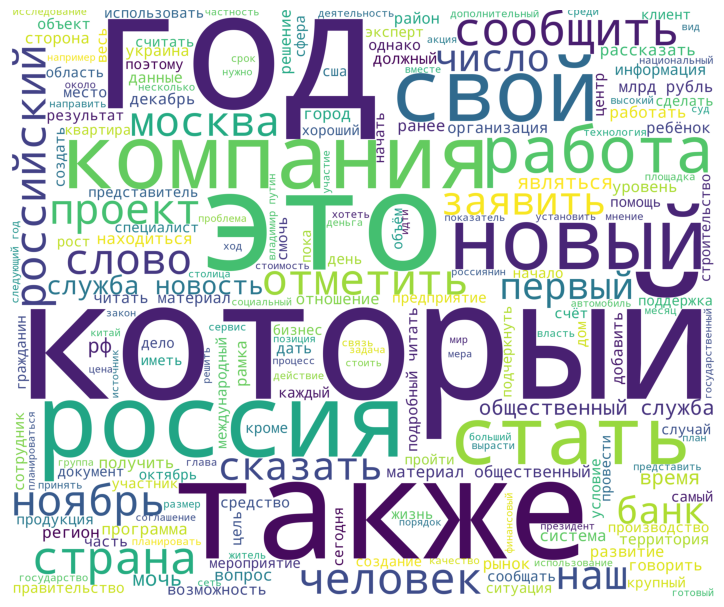

In [ ]:
procWordCloud = get_wordCloud(articles_proc_texts[:1000])
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')

In [ ]:
stop_words += ['также', 'который', 'наш', 'это', 'свой']
print(stop_words)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [ ]:
for article in articles_proc:
  article[0] = [word for word in article[0] if word not in stop_words]

print(len(articles_proc))
articles_proc[0]

66606


[['стать',
  'известно',
  'попытка',
  'запад',
  'помешать',
  'участие',
  'россия',
  'встреча',
  'обсе',
  'москва',
  'наблюдать',
  'попытка',
  'некоторый',
  'представитель',
  'запад',
  'помешать',
  'нормальный',
  'участие',
  'представитель',
  'россия',
  'заседание',
  'совет',
  'министр',
  'иностранный',
  'дело',
  'организация',
  'безопасность',
  'сотрудничество',
  'европа',
  'среда',
  '29',
  'ноябрь',
  'брифинг',
  'заявить',
  'официальный',
  'представитель',
  'мид',
  'россия',
  'мария',
  'захаров'],
 0]

In [ ]:
articles_proc_texts = [sublist[0] for sublist in articles_proc]
for i in range(len(articles_proc_texts)):
  articles_proc_texts[i] = ' '.join(articles_proc_texts[i])

print(len(articles_proc_texts))
articles_proc_texts[0]

66606


'стать известно попытка запад помешать участие россия встреча обсе москва наблюдать попытка некоторый представитель запад помешать нормальный участие представитель россия заседание совет министр иностранный дело организация безопасность сотрудничество европа среда 29 ноябрь брифинг заявить официальный представитель мид россия мария захаров'

(-0.5, 2999.5, 2499.5, -0.5)

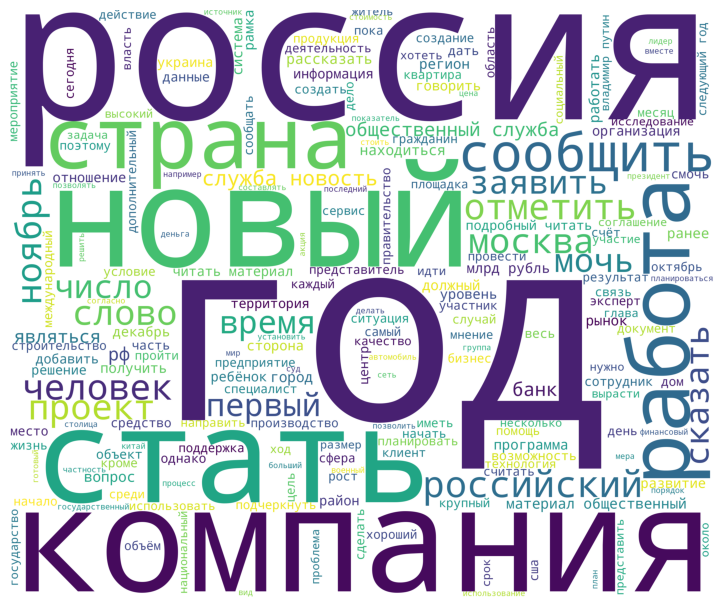

In [ ]:
procWordCloud = get_wordCloud(articles_proc_texts[:1000])
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')

## Сохранение

In [ ]:
articles_proc_relevances = [sublist[1] for sublist in articles_proc]
print(len(articles_proc_relevances))
articles_proc_relevances[0]

66606


0

In [ ]:
relevance_preproc_set = pd.DataFrame({'text': articles_proc_texts,
                                   'relevance': articles_proc_relevances})
relevance_preproc_set

,text,relevance
0,стать известно попытка запад помешать участие ...,0
1,правило приёмка квартира застройщик отделка ме...,0
2,сергей катырин предложить обсудить вопрос разв...,0
3,обновить сервис интеллектуальный поиск гарант ...,0
4,год отмечать ветеран великий отечественный вой...,0
...,...,...
66601,петербург выпустить тыс автомобиль конец год в...,1
66602,wsj атаковать судно вблизи индия бпнуть запуст...,1
66603,захватить грузовик водитель турция сдаться вла...,1
66604,турция неизвестный захватить заложник потребов...,1


In [ ]:
path_relevance_preproc_set = "drive/MyDrive/Career and Education/SBER/DS • ML/Articles proc/relevance_preproc_set.csv"
relevance_preproc_set.to_csv(path_relevance_preproc_set,
                          columns=['text', 'relevance'],
                          index=False,
                          encoding='utf-8')

## Загрузка предобработанного сета

In [3]:
path_relevance_preproc_set = "drive/MyDrive/Career and Education/SBER/DS • ML/Articles proc/relevance_preproc_set.csv"
relevance_preproc_set = pd.read_csv(path_relevance_preproc_set)
relevance_preproc_set

,text,relevance
0,стать известно попытка запад помешать участие ...,0
1,правило приёмка квартира застройщик отделка ме...,0
2,сергей катырин предложить обсудить вопрос разв...,0
3,обновить сервис интеллектуальный поиск гарант ...,0
4,год отмечать ветеран великий отечественный вой...,0
...,...,...
66601,петербург выпустить тыс автомобиль конец год в...,1
66602,wsj атаковать судно вблизи индия бпнуть запуст...,1
66603,захватить грузовик водитель турция сдаться вла...,1
66604,турция неизвестный захватить заложник потребов...,1


In [4]:
texts = relevance_preproc_set['text'].to_numpy()
print(len(texts))
texts[0]

66606


'стать известно попытка запад помешать участие россия встреча обсе москва наблюдать попытка некоторый представитель запад помешать нормальный участие представитель россия заседание совет министр иностранный дело организация безопасность сотрудничество европа среда ноябрь брифинг заявить официальный представитель мид россия мария захаров'

In [5]:
relevances = relevance_preproc_set['relevance'].to_numpy()
print(len(relevances))
relevances[0]

66606


0

# Моделирование

## Train-test split

In [6]:
X_train = texts[:26642].tolist()
X_train.extend(texts[39964:])
print(len(X_train))
X_train[0]

53284


'стать известно попытка запад помешать участие россия встреча обсе москва наблюдать попытка некоторый представитель запад помешать нормальный участие представитель россия заседание совет министр иностранный дело организация безопасность сотрудничество европа среда ноябрь брифинг заявить официальный представитель мид россия мария захаров'

In [7]:
y_train = relevances[:26642].tolist()
y_train.extend(relevances[39964:])
print(len(y_train))
y_train[0]

53284


0

In [8]:
counts = Counter(y_train)
print(counts[0])
print(counts[1])

26642
26642


In [9]:
X_test = texts[26642:33303].tolist()
X_test.extend(texts[33303:39964])
print(len(X_test))
X_test[0]

13322


'иракский группировка сообщить атака бпнуть база сша сирия один действовать иракский территория боевой группа поделиться сведение проведение атаковать цель который оказаться расположить один сирийский регион база сила штат риа новость публикация говориться проведение указанный атака боевик задействовать беспилотный летательный аппарат удаться поразить задать цель боец атаковать беспилотник база сирийский провинция добиться прямой попадание описать положение дело израильский сила поделиться сведение военнослужащий оказаться убить бпнуть город маргалиот расположить поблизости ливанский территория подробный читать материал общественный служба новость риа новость публикация говориться проведение указанный атака боевик задействовать беспилотный летательный аппарат удаться поразить задать цель боец атаковать беспилотник база сирийский провинция добиться прямой попадание описать положение дело израильский сила поделиться сведение военнослужащий оказаться убить бпнуть город маргалиот расположи

In [10]:
y_test = relevances[26642:33303].tolist()
y_test.extend(relevances[33303:39964])
print(len(y_test))
y_test[0]

13322


0

In [11]:
counts = Counter(y_test)
print(counts[0])
print(counts[1])

6661
6661


In [12]:
pairs_train = list(zip(X_train, y_train))
print(len(pairs_train))
pairs_train[0][0]

53284


'стать известно попытка запад помешать участие россия встреча обсе москва наблюдать попытка некоторый представитель запад помешать нормальный участие представитель россия заседание совет министр иностранный дело организация безопасность сотрудничество европа среда ноябрь брифинг заявить официальный представитель мид россия мария захаров'

In [13]:
pairs_test = list(zip(X_test, y_test))
print(len(pairs_test))
pairs_test[0][0]

13322


'иракский группировка сообщить атака бпнуть база сша сирия один действовать иракский территория боевой группа поделиться сведение проведение атаковать цель который оказаться расположить один сирийский регион база сила штат риа новость публикация говориться проведение указанный атака боевик задействовать беспилотный летательный аппарат удаться поразить задать цель боец атаковать беспилотник база сирийский провинция добиться прямой попадание описать положение дело израильский сила поделиться сведение военнослужащий оказаться убить бпнуть город маргалиот расположить поблизости ливанский территория подробный читать материал общественный служба новость риа новость публикация говориться проведение указанный атака боевик задействовать беспилотный летательный аппарат удаться поразить задать цель боец атаковать беспилотник база сирийский провинция добиться прямой попадание описать положение дело израильский сила поделиться сведение военнослужащий оказаться убить бпнуть город маргалиот расположи

In [14]:
pairs_train = shuffle(pairs_train, random_state=42)
print(len(pairs_train))
print(pairs_train[0][0])
print([sublist[1] for sublist in pairs_train])

53284
учение пройти успешно работник отряд отвечать пожарный безопасность здание выставочный центр вднх регулярно выезжать объект комплекс учение знание особенность район выезд отдельный сооружение здание объект залог успешный тушение пожар объект учение стать административный здание вднх огнеборец изучить особенность отточить навык умение тушение пожар здание должный уметь ориентироваться место произойти возгорание знать способствовать препятствовать возникновение развитие тушение пожар знание район выезд возможность следовать место вызов краткий путём знать близкий строение пожарный гидрант особенность планировка здание место отключение электроэнергия оценить угроза близкий строение рассказать заместитель начальник отряд юлия поповский занятие работник отряд проверить прилегать изучать здание территория путь подъезд расположение пожарный гидрант сам здание работник проверить система дымоудаление эвакуационный выход наличие пожарный рукав изучить планировка здание место документ предв

In [15]:
pairs_test = shuffle(pairs_test, random_state=42)
print(len(pairs_test))
print(pairs_test[0][0])
print([sublist[1] for sublist in pairs_test])

13322
поддержка предприниматель развитие инфраструктура финансовый помощь ozon десятка тысяча предприниматель вместе который развиваться каждый день хотеть продавец владелец пункт выдача комфортно мы сотрудничать особенно начинать вести бизнес работать небольшой город село видеть огромный потенциал всячески поддерживать расширять логистический инфраструктура обучать продавец финансово поддерживать владелец пункт выдача заказ результат говорить активный продавец малый город год стать вдвое оборот вырасти раз год активно продвигать новый формат домашний пункт поселение тыс житель давать руб развитие бизнес благодаря этот огромный ассортимент товар маркетплейс стать близкий житель малый поселение отдалить район целое год пункт выдача такой локация стать раз сегодня забрать заказ рядом свой дом мочь житель тыс малый город
[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1

In [16]:
X_train = [sublist[0] for sublist in pairs_train]
y_train = [sublist[1] for sublist in pairs_train]
X_test = [sublist[0] for sublist in pairs_test]
y_test = [sublist[1] for sublist in pairs_test]
print(len(X_train), ' ', len(y_train))
print(len(X_test), ' ', len(y_test))
print(X_train[0])
print(y_train[0])
print(X_test[0])
print(y_test[0])

53284   53284
13322   13322
учение пройти успешно работник отряд отвечать пожарный безопасность здание выставочный центр вднх регулярно выезжать объект комплекс учение знание особенность район выезд отдельный сооружение здание объект залог успешный тушение пожар объект учение стать административный здание вднх огнеборец изучить особенность отточить навык умение тушение пожар здание должный уметь ориентироваться место произойти возгорание знать способствовать препятствовать возникновение развитие тушение пожар знание район выезд возможность следовать место вызов краткий путём знать близкий строение пожарный гидрант особенность планировка здание место отключение электроэнергия оценить угроза близкий строение рассказать заместитель начальник отряд юлия поповский занятие работник отряд проверить прилегать изучать здание территория путь подъезд расположение пожарный гидрант сам здание работник проверить система дымоудаление эвакуационный выход наличие пожарный рукав изучить планировка здани

In [17]:
counts = Counter(y_train)
print(counts[0])
print(counts[1])

26642
26642


In [18]:
counts = Counter(y_test)
print(counts[0])
print(counts[1])

6661
6661


## SGDClassifier

По умолчанию\
\* без перемешивания

In [ ]:
pipe_sgd = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', SGDClassifier(shuffle=False))
])

In [ ]:
pipe_sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', SGDClassifier(shuffle=False))])

In [ ]:
predicted_sgd = pipe_sgd.predict(X_test)

In [ ]:
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      6993
           1       0.81      0.85      0.83      6329

    accuracy                           0.83     13322
   macro avg       0.83      0.83      0.83     13322
weighted avg       0.83      0.83      0.83     13322



Поиск оптимальных параметров

In [ ]:
pipe_sgd = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', SGDClassifier(shuffle=False))
])
parameters = [{
    # 'vect__max_features': [None, 5000, 10000, 50000],
    'vect__ngram_range': [(1,1), (1,2), (1,3)],
    # 'clf__alpha': (0.0001, 0.001, 0.01, 0.1),
    # 'clf__loss': ('hinge', 'log', 'squared_hinge', 'modified_huber'),
    # 'clf__penalty': ('l1', 'l2', 'elasticnet', None),
    'clf__max_iter': (10, 50, 100)
}]

In [ ]:
grid_search = GridSearchCV(pipe_sgd, parameters, n_jobs=1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

{'clf__max_iter': 50, 'vect__ngram_range': (1, 1)}
0.8604271139160179


In [ ]:
print(grid_search.best_estimator_)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', SGDClassifier(max_iter=50, shuffle=False))])


Модель с оптимальными параметрами

In [ ]:
pipe_sgd = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', SGDClassifier(max_iter=50, shuffle=False))
])

In [ ]:
pipe_sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', SGDClassifier(max_iter=50, shuffle=False))])

In [ ]:
predicted_sgd = pipe_sgd.predict(X_test)

In [ ]:
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      6993
           1       0.81      0.85      0.83      6329

    accuracy                           0.83     13322
   macro avg       0.83      0.83      0.83     13322
weighted avg       0.83      0.83      0.83     13322



## LogisticRegression

### solver lbfgs (default)

По умолчанию

In [ ]:
pipe_logreg = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

In [ ]:
pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', LogisticRegression())])

In [ ]:
predicted_logreg = pipe_logreg.predict(X_test)

In [ ]:
print(metrics.classification_report(predicted_logreg, y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      6819
           1       0.84      0.86      0.85      6503

    accuracy                           0.85     13322
   macro avg       0.85      0.85      0.85     13322
weighted avg       0.85      0.85      0.85     13322



Поиск оптимальных параметров

In [ ]:
pipe_logreg = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=300))
])
parameters = [{
    # 'vect__max_features': [None, 5000, 10000, 50000],
    # 'vect__ngram_range': [(1,1), (1,2), (1,3)],
    # 'clf__penalty': ('l1', 'l2', 'elasticnet'),
    'clf__C': (14, 13, 12)
}]

In [ ]:
%%time
grid_search = GridSearchCV(pipe_logreg, parameters, n_jobs=1, cv=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__C': 13}
0.8936641924372596
CPU times: user 4min 48s, sys: 2min 59s, total: 7min 47s
Wall time: 5min 39s


In [ ]:
print(grid_search.best_estimator_)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(C=13, max_iter=300))])


Модель с оптимальными параметрами

In [ ]:
pipe_logreg = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression(C=13, max_iter=300))
])

In [ ]:
pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(C=13, max_iter=300))])

In [ ]:
predicted_logreg = pipe_logreg.predict(X_test)

In [ ]:
print(metrics.classification_report(predicted_logreg, y_test))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6754
           1       0.87      0.88      0.88      6568

    accuracy                           0.88     13322
   macro avg       0.88      0.88      0.88     13322
weighted avg       0.88      0.88      0.88     13322



### solver sag (alternative) <- best

По умолчанию

In [ ]:
pipe_logreg = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='sag'))
])

In [ ]:
pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(solver='saga'))])

In [ ]:
predicted_logreg = pipe_logreg.predict(X_test)

In [ ]:
print(metrics.classification_report(predicted_logreg, y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      6819
           1       0.84      0.86      0.85      6503

    accuracy                           0.85     13322
   macro avg       0.85      0.85      0.85     13322
weighted avg       0.85      0.85      0.85     13322



Поиск оптимальных параметров

In [ ]:
pipe_logreg = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='sag', max_iter=300))
])
parameters = [{
    # 'vect__max_features': [None, 5000, 10000, 50000],
    # 'vect__ngram_range': [(1,1), (1,2), (1,3)],
    # 'clf__penalty': ('l1', 'l2', 'elasticnet'),
    'clf__C': (14, 13, 12)
}]

In [ ]:
%%time
grid_search = GridSearchCV(pipe_logreg, parameters, n_jobs=1, cv=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__C': 13}
0.8936454257818528
CPU times: user 2min 54s, sys: 1.52 s, total: 2min 55s
Wall time: 2min 57s


In [ ]:
print(grid_search.best_estimator_)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(C=13, max_iter=300, solver='sag'))])


Модель с оптимальными параметрами

In [19]:
pipe_logreg = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression(C=13, solver='sag', max_iter=300))
])

In [20]:
pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(C=13, max_iter=300, solver='sag'))])

In [21]:
predicted_logreg = pipe_logreg.predict(X_test)

In [22]:
print(metrics.classification_report(predicted_logreg, y_test))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6759
           1       0.87      0.88      0.88      6563

    accuracy                           0.88     13322
   macro avg       0.88      0.88      0.88     13322
weighted avg       0.88      0.88      0.88     13322



In [23]:
from joblib import Parallel, delayed
import joblib

path_model = 'drive/MyDrive/Career and Education/SBER/DS • ML/Articles proc/logreg_clf.pkl'
joblib.dump(pipe_logreg, path_model)

['drive/MyDrive/Career and Education/SBER/DS • ML/Articles proc/logreg_clf.pkl']

In [24]:
path_model = 'drive/MyDrive/Career and Education/SBER/DS • ML/Articles proc/logreg_clf.pkl'
pipe_logreg_pkl = joblib.load(path_model)

predicted_logreg_pkl = pipe_logreg_pkl.predict(X_test)
print(metrics.classification_report(predicted_logreg_pkl, y_test))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6759
           1       0.87      0.88      0.88      6563

    accuracy                           0.88     13322
   macro avg       0.88      0.88      0.88     13322
weighted avg       0.88      0.88      0.88     13322



## KNeighborsClassifier

По умолчанию

In [ ]:
pipe_knn = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', KNeighborsClassifier())
])

In [ ]:
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [ ]:
%%time
predicted_knn = pipe_knn.predict(X_test)

CPU times: user 4h 41min 16s, sys: 14.8 s, total: 4h 41min 30s
Wall time: 2h 46min 31s


In [ ]:
print(metrics.classification_report(predicted_knn, y_test))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      5880
           1       0.80      0.72      0.76      7442

    accuracy                           0.74     13322
   macro avg       0.74      0.75      0.74     13322
weighted avg       0.75      0.74      0.74     13322



## MultinomialNB

По умолчанию

In [ ]:
pipe_nb = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [ ]:
pipe_nb.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
predicted_nb = pipe_nb.predict(X_test)

In [ ]:
print(metrics.classification_report(predicted_nb, y_test))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72      5648
           1       0.82      0.71      0.76      7674

    accuracy                           0.74     13322
   macro avg       0.74      0.75      0.74     13322
weighted avg       0.75      0.74      0.74     13322



## RandomForestClassifier

По умолчанию

In [ ]:
pipe_rf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

In [ ]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', RandomForestClassifier())])

In [ ]:
predicted_rf = pipe_rf.predict(X_test)

In [ ]:
print(metrics.classification_report(predicted_rf, y_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      6415
           1       0.83      0.80      0.82      6907

    accuracy                           0.82     13322
   macro avg       0.82      0.82      0.82     13322
weighted avg       0.82      0.82      0.82     13322



Поиск оптимальных параметров

In [ ]:
pipe_rf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])
parameters = [{
    # 'vect__max_features': [None, 5000, 10000, 50000],
    # 'vect__ngram_range': [(1,1), (1,2), (1,3)],
    'clf__n_estimators': [130, 150, 170]
}]

In [ ]:
grid_search = GridSearchCV(pipe_rf, parameters, n_jobs=1, cv=2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__n_estimators': 150}
0.8506493506493507


In [ ]:
print(grid_search.best_estimator_)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_estimators=150))])


Модель с оптимальными параметрами

In [ ]:
pipe_rf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', RandomForestClassifier(n_estimators=150))
])

In [ ]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_estimators=150))])

In [ ]:
predicted_rf = pipe_rf.predict(X_test)

In [ ]:
print(metrics.classification_report(predicted_rf, y_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      6377
           1       0.84      0.80      0.82      6945

    accuracy                           0.82     13322
   macro avg       0.82      0.82      0.82     13322
weighted avg       0.82      0.82      0.82     13322



# Оценка

## SGDClassifier

In [ ]:
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      6993
           1       0.81      0.85      0.83      6329

    accuracy                           0.83     13322
   macro avg       0.83      0.83      0.83     13322
weighted avg       0.83      0.83      0.83     13322



## LogisticRegression

### solver lbfgs (default)

In [ ]:
print(metrics.classification_report(predicted_logreg, y_test))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6754
           1       0.87      0.88      0.88      6568

    accuracy                           0.88     13322
   macro avg       0.88      0.88      0.88     13322
weighted avg       0.88      0.88      0.88     13322



### solver sag (alternative) <- best

In [ ]:
print(metrics.classification_report(predicted_logreg, y_test))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6759
           1       0.87      0.88      0.88      6563

    accuracy                           0.88     13322
   macro avg       0.88      0.88      0.88     13322
weighted avg       0.88      0.88      0.88     13322



**Интерпретация**

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_logreg)
print(conf_matrix)

[[5901  760]
 [ 858 5803]]


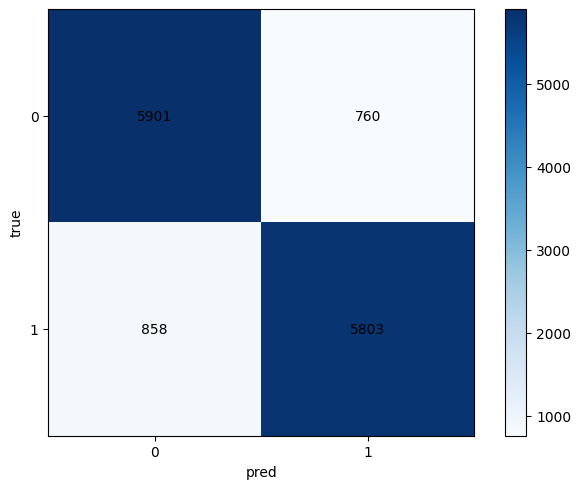

In [ ]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.tight_layout()
plt.xlabel('pred')
plt.ylabel('true')

for i in range(len(np.unique(y_test))):
  for j in range(len(np.unique(y_test))):
    plt.annotate(str(conf_matrix[i, j]), xy=(j, i), ha='center', va='center')

plt.show()

In [ ]:
vocab = pipe_logreg.named_steps['vect'].vocabulary_
print(len(vocab))
print(list(vocab.keys())[list(vocab.values()).index(115000)])
print(vocab['белком'])

138985
соцплатформа
29120


In [ ]:
def get_most_important_features(model, n=5):
    index_to_word = {v:k for k,v in vocab.items()}

    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(pipe_logreg.named_steps['clf'], 15)

In [ ]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])

    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)

    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]

    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]

    fig = plt.figure(figsize=(10, 10))

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Irrelevant', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.xlabel('Importance', fontsize=20)

    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Relevant', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.xlabel('Importance', fontsize=20)

    plt.subplots_adjust(wspace=0.8)
    plt.show()

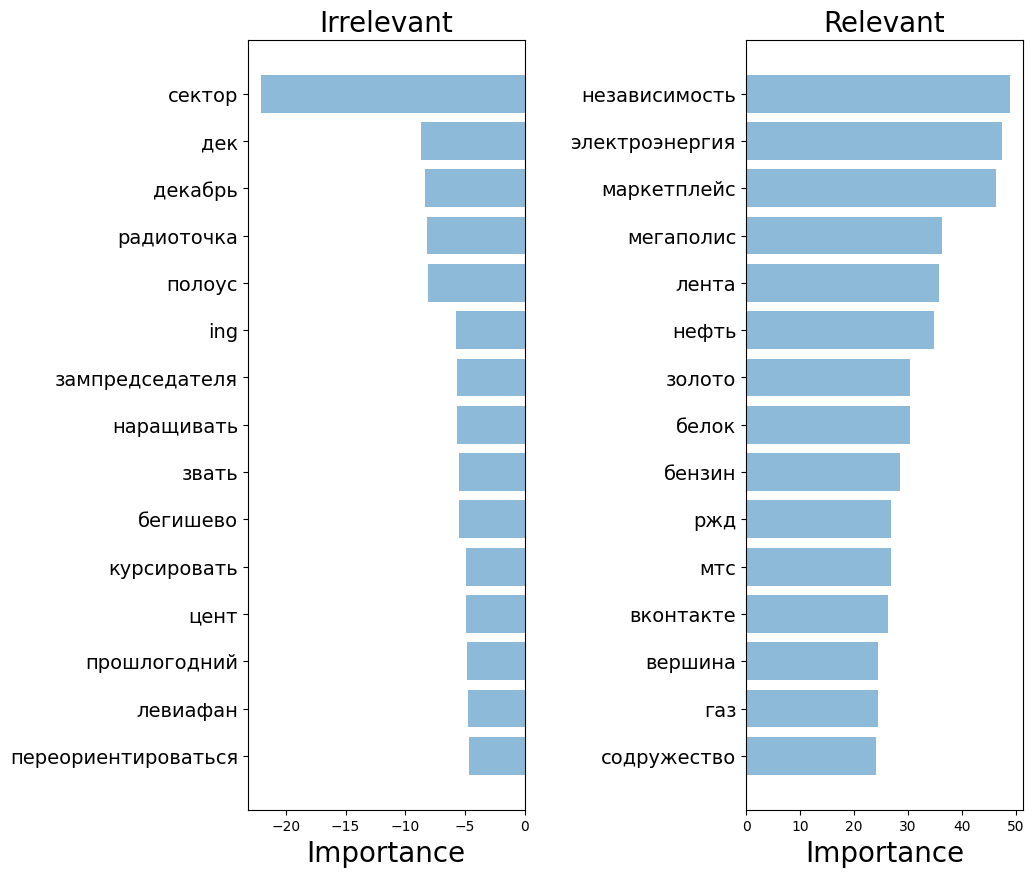

In [ ]:
top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words)

## KNeighborsClassifier

In [ ]:
print(metrics.classification_report(predicted_knn, y_test))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      5880
           1       0.80      0.72      0.76      7442

    accuracy                           0.74     13322
   macro avg       0.74      0.75      0.74     13322
weighted avg       0.75      0.74      0.74     13322



## MultinomialNB

In [ ]:
print(metrics.classification_report(predicted_nb, y_test))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72      5648
           1       0.82      0.71      0.76      7674

    accuracy                           0.74     13322
   macro avg       0.74      0.75      0.74     13322
weighted avg       0.75      0.74      0.74     13322



## RandomForestClassifier

In [ ]:
print(metrics.classification_report(predicted_rf, y_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      6377
           1       0.84      0.80      0.82      6945

    accuracy                           0.82     13322
   macro avg       0.82      0.82      0.82     13322
weighted avg       0.82      0.82      0.82     13322



# Валидация (logreg solver sag)

## Загрузка

In [ ]:
path_db_100 = "drive/MyDrive/Career and Education/SBER/DS • ML/Articles proc/db_100.csv"
db_100 = pd.read_csv(path_db_100)
db_100

,id,source,url,title,content,created_at
0,251316,Tass,https://tass.ru/mezhdunarodnaya-panorama/19969621,El Pais: Запад обеспокоен быстрым увеличением ...,"Западные страны серьезно обеспокоены тем, что ...",2024-02-13 09:05:14+00
1,251315,Tass,https://tass.ru/mezhdunarodnaya-panorama/19969515,В город Гома в ДР Конго перебрасывают дополнит...,Командование ВС Демократической Республики Кон...,2024-02-13 09:09:12+00
2,251314,Tass,https://tass.ru/mezhdunarodnaya-panorama/19969653,"Глава Минсельхоза Индии заявил, что правительс...",Власти Индии готовы обсуждать и решать проблем...,2024-02-13 09:10:04+00
3,251313,Tass,https://tass.ru/politika/19969709,Лавров: палестино-израильский конфликт надо бы...,Палестино-израильский конфликт требовалось уре...,2024-02-13 09:11:14+00
4,251312,Tass,https://tass.ru/mezhdunarodnaya-panorama/19969647,"В Швеции заявили, что террористическая угроза ...",Уровень террористической угрозы для Швеции в 2...,2024-02-13 09:12:08+00
...,...,...,...,...,...,...
95,251221,Energyland,https://energyland.info/news-show--teplo-253327,ГУП «ТЭК СПб» подключит к теплоснабжению свыше...,"Так, в течение года планируется подключить 13 ...",2024-02-13 08:03:00+00
96,251220,Energyland,https://energyland.info/news-show--electro-253328,ОЭС Востока отнесена к территориям технологиче...,Председатель правления Системного оператора Фе...,2024-02-13 08:33:00+00
97,251219,Life,https://life.ru/p/1639415,Более ста тысяч россиян остались без света из-...,"Более ста тысяч человек, которые проживают в р...",2024-02-13 08:07:52+00
98,251218,Life,https://life.ru/p/1639424,"""Бог прикрыл"": Жительница Авдеевки под прицело...",Жительница Авдеевки Валентина потеряла отца и ...,2024-02-13 08:30:20+00


In [ ]:
path_db_100_res = "drive/MyDrive/Career and Education/SBER/DS • ML/Articles proc/db_100_result.csv"
db_100_res = pd.read_csv(path_db_100_res)
db_100_res

,id,content,keywords
0,251314,Власти Индии готовы обсуждать и решать проблем...,газ
1,251301,Дочерняя компания Crocus Group бизнесмена Арас...,crocus
2,251287,Аэропорт турецкого города Анталья временно зак...,домодедово
3,251271,Страной с самым большим спросом на нефть в бли...,"газ, нефть"
4,251270,Власти Индии сохраняют интерес к участию в неф...,"газ, газпром, нефть, новатэк, спг"
5,251267,Сжиженный природный газ (СПГ) из США в 2024-20...,"газ, спг"
6,251265,"Около половины танкеров из 50, которые оказали...","газ, нефть"
7,251262,Власти РФ задумались о сокращении лимита беспо...,маркетплейс
8,251250,На петербургском рынке в январе сменился лидер...,"авить, автоваз"
9,251249,Жители Петербурга пожаловались на потоп на про...,мегаполис


In [ ]:
ids_in_res = set(db_100_res['id'])
db_100['relevance'] = db_100['id'].isin(ids_in_res).astype(int)
db_100['relevance'].value_counts()

0    87
1    13
Name: relevance, dtype: int64

## Предобработка

In [ ]:
titles = db_100['title'].to_numpy()
print(titles[0])

contents = db_100['content'].to_numpy()
print(contents[0])

relevances = db_100['relevance'].to_numpy()
print(relevances[0])

El Pais: Запад обеспокоен быстрым увеличением мощностей РФ по военному производству
Западные страны серьезно обеспокоены тем, что Россия столь быстро увеличила свои мощности по производству военной техники. Об этом пишет испанская газета El Pais. По ее версии, в странах НАТО пытаются разъяснить гражданам необходимость увеличения расходов на оборону. Как полагает издание, отношения Запада с Россией не улучшатся и при оптимистичном сценарии останутся неизменными. Как отмечает газета, тот факт, что Москва так быстро увеличила свои мощности по производству военной техники, вызывает серьезную обеспокоенность. В свою очередь европейская оборонная промышленность движется медленными темпами, подчеркивает издание. Предвыборная гонка в США и участие в ней экс-главы Белого дома Дональда Трампа еще больше обостряют дебаты в странах НАТО о необходимости довести военные расходы до 2% ВВП, пишет El Pais. Трамп, претендующий на выдвижение кандидатом в президенты от Республиканской партии, 10 февраля в

In [ ]:
articles = []
for i in range(len(titles)):
  articles.append(['', 0])
  articles[i][0] = titles[i] + ' ' + contents[i]
  articles[i][1] = relevances[i]

articles[0]

['El Pais: Запад обеспокоен быстрым увеличением мощностей РФ по военному производству Западные страны серьезно обеспокоены тем, что Россия столь быстро увеличила свои мощности по производству военной техники. Об этом пишет испанская газета El Pais. По ее версии, в странах НАТО пытаются разъяснить гражданам необходимость увеличения расходов на оборону. Как полагает издание, отношения Запада с Россией не улучшатся и при оптимистичном сценарии останутся неизменными. Как отмечает газета, тот факт, что Москва так быстро увеличила свои мощности по производству военной техники, вызывает серьезную обеспокоенность. В свою очередь европейская оборонная промышленность движется медленными темпами, подчеркивает издание. Предвыборная гонка в США и участие в ней экс-главы Белого дома Дональда Трампа еще больше обостряют дебаты в странах НАТО о необходимости довести военные расходы до 2% ВВП, пишет El Pais. Трамп, претендующий на выдвижение кандидатом в президенты от Республиканской партии, 10 февраля

Токенизация

In [ ]:
articles_proc = articles
for article in articles_proc:
  article[0] = word_tokenize(article[0])

print(articles_proc[0])

[['El', 'Pais', ':', 'Запад', 'обеспокоен', 'быстрым', 'увеличением', 'мощностей', 'РФ', 'по', 'военному', 'производству', 'Западные', 'страны', 'серьезно', 'обеспокоены', 'тем', ',', 'что', 'Россия', 'столь', 'быстро', 'увеличила', 'свои', 'мощности', 'по', 'производству', 'военной', 'техники', '.', 'Об', 'этом', 'пишет', 'испанская', 'газета', 'El', 'Pais', '.', 'По', 'ее', 'версии', ',', 'в', 'странах', 'НАТО', 'пытаются', 'разъяснить', 'гражданам', 'необходимость', 'увеличения', 'расходов', 'на', 'оборону', '.', 'Как', 'полагает', 'издание', ',', 'отношения', 'Запада', 'с', 'Россией', 'не', 'улучшатся', 'и', 'при', 'оптимистичном', 'сценарии', 'останутся', 'неизменными', '.', 'Как', 'отмечает', 'газета', ',', 'тот', 'факт', ',', 'что', 'Москва', 'так', 'быстро', 'увеличила', 'свои', 'мощности', 'по', 'производству', 'военной', 'техники', ',', 'вызывает', 'серьезную', 'обеспокоенность', '.', 'В', 'свою', 'очередь', 'европейская', 'оборонная', 'промышленность', 'движется', 'медленным

Нижний регистр

In [ ]:
for article in articles_proc:
  article[0] = [word.lower() for word in article[0]]

print(articles_proc[0])

[['el', 'pais', ':', 'запад', 'обеспокоен', 'быстрым', 'увеличением', 'мощностей', 'рф', 'по', 'военному', 'производству', 'западные', 'страны', 'серьезно', 'обеспокоены', 'тем', ',', 'что', 'россия', 'столь', 'быстро', 'увеличила', 'свои', 'мощности', 'по', 'производству', 'военной', 'техники', '.', 'об', 'этом', 'пишет', 'испанская', 'газета', 'el', 'pais', '.', 'по', 'ее', 'версии', ',', 'в', 'странах', 'нато', 'пытаются', 'разъяснить', 'гражданам', 'необходимость', 'увеличения', 'расходов', 'на', 'оборону', '.', 'как', 'полагает', 'издание', ',', 'отношения', 'запада', 'с', 'россией', 'не', 'улучшатся', 'и', 'при', 'оптимистичном', 'сценарии', 'останутся', 'неизменными', '.', 'как', 'отмечает', 'газета', ',', 'тот', 'факт', ',', 'что', 'москва', 'так', 'быстро', 'увеличила', 'свои', 'мощности', 'по', 'производству', 'военной', 'техники', ',', 'вызывает', 'серьезную', 'обеспокоенность', '.', 'в', 'свою', 'очередь', 'европейская', 'оборонная', 'промышленность', 'движется', 'медленным

Удаление символов

In [ ]:
for article in articles_proc:
  article[0] = [word for word in article[0] if re.match('^[а-яa-z0-9]*$', word)]

print(articles_proc[0])

[['el', 'pais', 'запад', 'обеспокоен', 'быстрым', 'увеличением', 'мощностей', 'рф', 'по', 'военному', 'производству', 'западные', 'страны', 'серьезно', 'обеспокоены', 'тем', 'что', 'россия', 'столь', 'быстро', 'увеличила', 'свои', 'мощности', 'по', 'производству', 'военной', 'техники', 'об', 'этом', 'пишет', 'испанская', 'газета', 'el', 'pais', 'по', 'ее', 'версии', 'в', 'странах', 'нато', 'пытаются', 'разъяснить', 'гражданам', 'необходимость', 'увеличения', 'расходов', 'на', 'оборону', 'как', 'полагает', 'издание', 'отношения', 'запада', 'с', 'россией', 'не', 'улучшатся', 'и', 'при', 'оптимистичном', 'сценарии', 'останутся', 'неизменными', 'как', 'отмечает', 'газета', 'тот', 'факт', 'что', 'москва', 'так', 'быстро', 'увеличила', 'свои', 'мощности', 'по', 'производству', 'военной', 'техники', 'вызывает', 'серьезную', 'обеспокоенность', 'в', 'свою', 'очередь', 'европейская', 'оборонная', 'промышленность', 'движется', 'медленными', 'темпами', 'подчеркивает', 'издание', 'предвыборная', 'г

Стоп-слова

In [ ]:
stop_words = stopwords.words('russian')
stop_words += ['также', 'который', 'наш', 'это', 'свой']
print(stop_words)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [ ]:
for article in articles_proc:
  article[0] = [word for word in article[0] if word not in stop_words]

print(articles_proc[0])

[['el', 'pais', 'запад', 'обеспокоен', 'быстрым', 'увеличением', 'мощностей', 'рф', 'военному', 'производству', 'западные', 'страны', 'серьезно', 'обеспокоены', 'россия', 'столь', 'быстро', 'увеличила', 'свои', 'мощности', 'производству', 'военной', 'техники', 'пишет', 'испанская', 'газета', 'el', 'pais', 'версии', 'странах', 'нато', 'пытаются', 'разъяснить', 'гражданам', 'необходимость', 'увеличения', 'расходов', 'оборону', 'полагает', 'издание', 'отношения', 'запада', 'россией', 'улучшатся', 'оптимистичном', 'сценарии', 'останутся', 'неизменными', 'отмечает', 'газета', 'факт', 'москва', 'быстро', 'увеличила', 'свои', 'мощности', 'производству', 'военной', 'техники', 'вызывает', 'серьезную', 'обеспокоенность', 'очередь', 'европейская', 'оборонная', 'промышленность', 'движется', 'медленными', 'темпами', 'подчеркивает', 'издание', 'предвыборная', 'гонка', 'сша', 'участие', 'белого', 'дома', 'дональда', 'трампа', 'обостряют', 'дебаты', 'странах', 'нато', 'необходимости', 'довести', 'воен

Удаление числовых слов

In [ ]:
for article in articles_proc:
  article[0] = [word for word in article[0] if not word.isdigit()]

print(articles_proc[0])

[['el', 'pais', 'запад', 'обеспокоен', 'быстрым', 'увеличением', 'мощностей', 'рф', 'военному', 'производству', 'западные', 'страны', 'серьезно', 'обеспокоены', 'россия', 'столь', 'быстро', 'увеличила', 'свои', 'мощности', 'производству', 'военной', 'техники', 'пишет', 'испанская', 'газета', 'el', 'pais', 'версии', 'странах', 'нато', 'пытаются', 'разъяснить', 'гражданам', 'необходимость', 'увеличения', 'расходов', 'оборону', 'полагает', 'издание', 'отношения', 'запада', 'россией', 'улучшатся', 'оптимистичном', 'сценарии', 'останутся', 'неизменными', 'отмечает', 'газета', 'факт', 'москва', 'быстро', 'увеличила', 'свои', 'мощности', 'производству', 'военной', 'техники', 'вызывает', 'серьезную', 'обеспокоенность', 'очередь', 'европейская', 'оборонная', 'промышленность', 'движется', 'медленными', 'темпами', 'подчеркивает', 'издание', 'предвыборная', 'гонка', 'сша', 'участие', 'белого', 'дома', 'дональда', 'трампа', 'обостряют', 'дебаты', 'странах', 'нато', 'необходимости', 'довести', 'воен

In [ ]:
for article in articles_proc:
  article[0] = [word for word in article[0] if not re.match('[0-9]', word[0])]

print(articles_proc[0])

[['el', 'pais', 'запад', 'обеспокоен', 'быстрым', 'увеличением', 'мощностей', 'рф', 'военному', 'производству', 'западные', 'страны', 'серьезно', 'обеспокоены', 'россия', 'столь', 'быстро', 'увеличила', 'свои', 'мощности', 'производству', 'военной', 'техники', 'пишет', 'испанская', 'газета', 'el', 'pais', 'версии', 'странах', 'нато', 'пытаются', 'разъяснить', 'гражданам', 'необходимость', 'увеличения', 'расходов', 'оборону', 'полагает', 'издание', 'отношения', 'запада', 'россией', 'улучшатся', 'оптимистичном', 'сценарии', 'останутся', 'неизменными', 'отмечает', 'газета', 'факт', 'москва', 'быстро', 'увеличила', 'свои', 'мощности', 'производству', 'военной', 'техники', 'вызывает', 'серьезную', 'обеспокоенность', 'очередь', 'европейская', 'оборонная', 'промышленность', 'движется', 'медленными', 'темпами', 'подчеркивает', 'издание', 'предвыборная', 'гонка', 'сша', 'участие', 'белого', 'дома', 'дональда', 'трампа', 'обостряют', 'дебаты', 'странах', 'нато', 'необходимости', 'довести', 'воен

Лемматизация

In [ ]:
morph = MorphAnalyzer()
for article in articles_proc:
  for word in article[0]:
    if word == 'белком':
      continue
    parsed = morph.parse(word)[0]
    article[0][article[0].index(word)] = parsed.normal_form

print(articles_proc[0])

[['el', 'pais', 'запад', 'обеспокоить', 'быстрый', 'увеличение', 'мощность', 'рф', 'военный', 'производство', 'западный', 'страна', 'серьёзно', 'обеспокоить', 'россия', 'столь', 'быстро', 'увеличить', 'свой', 'мощность', 'производство', 'военный', 'техника', 'писать', 'испанский', 'газета', 'el', 'pais', 'версия', 'страна', 'нато', 'пытаться', 'разъяснить', 'гражданин', 'необходимость', 'увеличение', 'расход', 'оборона', 'полагать', 'издание', 'отношение', 'запад', 'россия', 'улучшиться', 'оптимистичный', 'сценарий', 'остаться', 'неизменный', 'отмечать', 'газета', 'факт', 'москва', 'быстро', 'увеличить', 'свой', 'мощность', 'производство', 'военный', 'техника', 'вызывать', 'серьёзный', 'обеспокоенность', 'очередь', 'европейский', 'оборонный', 'промышленность', 'двигаться', 'медленный', 'темп', 'подчёркивать', 'издание', 'предвыборный', 'гонка', 'сша', 'участие', 'белый', 'дом', 'дональд', 'трамп', 'обострять', 'дебаты', 'страна', 'нато', 'необходимость', 'довести', 'военный', 'расход',

In [ ]:
articles_proc_texts = [sublist[0] for sublist in articles_proc]
for i in range(len(articles_proc_texts)):
  articles_proc_texts[i] = ' '.join(articles_proc_texts[i])

print(articles_proc_texts[0])

el pais запад обеспокоить быстрый увеличение мощность рф военный производство западный страна серьёзно обеспокоить россия столь быстро увеличить свой мощность производство военный техника писать испанский газета el pais версия страна нато пытаться разъяснить гражданин необходимость увеличение расход оборона полагать издание отношение запад россия улучшиться оптимистичный сценарий остаться неизменный отмечать газета факт москва быстро увеличить свой мощность производство военный техника вызывать серьёзный обеспокоенность очередь европейский оборонный промышленность двигаться медленный темп подчёркивать издание предвыборный гонка сша участие белый дом дональд трамп обострять дебаты страна нато необходимость довести военный расход ввп писать el pais трамп претендовать выдвижение кандидат президент республиканский партия февраль вспомнить один встреча лидер страна нато слово президент спросить готовый сша защитить альянс случай якобы возможный угроза сторона рф страна делать взнос оборона 

In [ ]:
articles_proc_relevances = [sublist[1] for sublist in articles_proc]
articles_proc_relevances[0]

0

## Тестирование

In [ ]:
predicted_logreg = pipe_logreg.predict(articles_proc_texts)

In [ ]:
print(metrics.classification_report(predicted_logreg, articles_proc_relevances))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        78
           1       0.85      0.50      0.63        22

    accuracy                           0.87       100
   macro avg       0.86      0.74      0.77       100
weighted avg       0.87      0.87      0.86       100



## Оценка

In [ ]:
conf_matrix = confusion_matrix(articles_proc_relevances, predicted_logreg)
print(conf_matrix)

[[76 11]
 [ 2 11]]


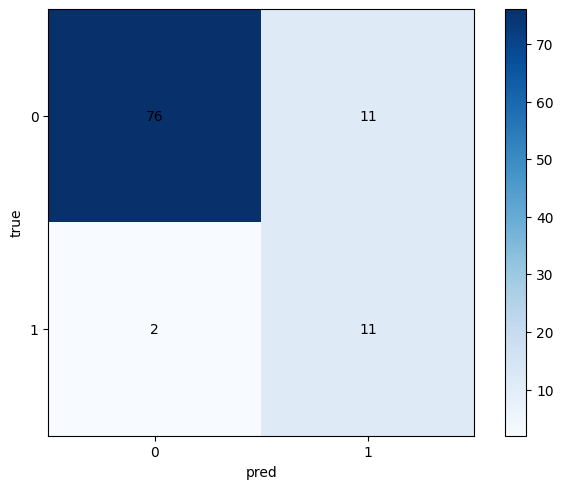

In [ ]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.tight_layout()
plt.xlabel('pred')
plt.ylabel('true')

for i in range(len(np.unique(y_test))):
  for j in range(len(np.unique(y_test))):
    plt.annotate(str(conf_matrix[i, j]), xy=(j, i), ha='center', va='center')

plt.show()

False positives

In [ ]:
predicted_fp = [0] * len(predicted_logreg)

for i in range(len(articles_proc_relevances)):
  if predicted_logreg[i] == 1:
    if articles_proc_relevances[i] == 0:
      predicted_fp[i] = 1

print(predicted_fp)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]


In [ ]:
for i in range(len(predicted_fp)):
  if predicted_fp[i] == 1:
    print(articles[i][0])

Затопленная дождями Анталья попала на видео Улицы турецкого города Анталья оказались затоплены мощными дождями. Видео с погрузившимися под воду дорогами опубликовало сообщество «Фобос. Катаклизмы и катастрофы природы» в соцсети «ВКонтакте». На снятых очевидцами кадрах можно увидеть наполовину ушедшие под воду автомобили, затопленные детские площадки и дворы. Как сообщает KP.RU, из-за непогоды занятия в местных школах и вузах пришлось отменить. На данный момент в городе сохраняются неблагоприятные погодные условия. Ранее стало известно, что более 250 тысяч жителей Дагестана остались без электричества из-за урагана. Света лишились жители сразу нескольких населенных пунктов, в том числе в Махачкале. Из-за шквалистого ветра во многих районах к ремонту приступили с задержкой.
Котировки на Токийской бирже обновили 34-летний максимум Котировки на Токийской фондовой бирже (ТФБ), вернувшей себе в начале 2024 года статус крупнейшей в Азии, вышли на самый высокий за последние 34 года уровень. Как

False negatives

In [ ]:
predicted_fn = [0] * len(predicted_logreg)

for i in range(len(articles_proc_relevances)):
  if predicted_logreg[i] == 0:
    if articles_proc_relevances[i] == 1:
      predicted_fn[i] = 1

print(predicted_fn)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
for i in range(len(predicted_fn)):
  if predicted_fn[i] == 1:
    print(articles[i][0])

Глава Минсельхоза Индии заявил, что правительство готово решать проблемы фермеров Власти Индии готовы обсуждать и решать проблемы фермеров и выступают за их благополучие. Об этом заявил министр сельского хозяйства республики Арджун Мунда на фоне проведения сельхозработниками марша протеста. "Правительство Индии стремится обеспечить благополучие фермеров. По некоторым темам с ними достигнута договоренность <...>. Мы открыты для [обсуждения] многих вопросов и можем работать над поиском путей решения", - приводит его слова агентство АNI. Министр сельского хозяйства штата Раджастан Кироди Лал Мина заявил, что за организацией марша протеста фермеров стоит оппозиция. "Акция проводится в преддверии выборов, это означает, что вовлечены оппозиционные партии. Этот марш проводится не для фермеров, а чтобы обеспечить преимущества политическим партиям", - указал Лал Мина. Фермеры индийских центральных штатов Пенджаб, Харьяна и Уттар-Прадеш объявили о марше протеста, требуя от правительства принять 

True positives

In [ ]:
predicted_tp = [0] * len(predicted_logreg)

for i in range(len(articles_proc_relevances)):
  if predicted_logreg[i] == 1:
    if articles_proc_relevances[i] == 1:
      predicted_tp[i] = 1

print(predicted_tp)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
for i in range(len(predicted_tp)):
  if predicted_tp[i] == 1:
    print(articles[i][0])

Крокус выплатит "Автодору" 38 млн рублей по мировому соглашению по иску по ЦКАД Дочерняя компания Crocus Group бизнесмена Араса Агаларова - АО "Крокус Интернэшнл" выплатит "Российским автомобильным дорогам" ("Автодор") 38 млн рублей по иску госкомпании о ненадлежащем исполнении контракта на строительство Центральной кольцевой автодороги (ЦКАД) в Подмосковье, следует из данных картотеки арбитражных дел. Исковые требования "Автодора" по этому делу составляли почти 3,9 млрд рублей. "Арбитражный суд определил утвердить мировое соглашение, заключенное между государственной компанией "Российские автомобильные дороги" (истец) и АО " Крокус Интернэшнл" (ответчик) на следующих условиях: <…> АО "Крокус Интернэшнл" обязуется выплатить денежные средства в размере 38 млн рублей в качестве неустойки за ненадлежащее исполнение своих обязательств по долгосрочному инвестиционному соглашению", - говорится в материалах Арбитражного суда Москвы. В рамках этого мирового соглашения "Крокус интернэшнл" призн

True negatives

In [ ]:
predicted_tn = [0] * len(predicted_logreg)

for i in range(len(articles_proc_relevances)):
  if predicted_logreg[i] == 0:
    if articles_proc_relevances[i] == 0:
      predicted_tn[i] = 1

print(predicted_tn)

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]


In [ ]:
for i in range(len(predicted_tn)):
  if predicted_tn[i] == 1:
    print(articles[i][0])

El Pais: Запад обеспокоен быстрым увеличением мощностей РФ по военному производству Западные страны серьезно обеспокоены тем, что Россия столь быстро увеличила свои мощности по производству военной техники. Об этом пишет испанская газета El Pais. По ее версии, в странах НАТО пытаются разъяснить гражданам необходимость увеличения расходов на оборону. Как полагает издание, отношения Запада с Россией не улучшатся и при оптимистичном сценарии останутся неизменными. Как отмечает газета, тот факт, что Москва так быстро увеличила свои мощности по производству военной техники, вызывает серьезную обеспокоенность. В свою очередь европейская оборонная промышленность движется медленными темпами, подчеркивает издание. Предвыборная гонка в США и участие в ней экс-главы Белого дома Дональда Трампа еще больше обостряют дебаты в странах НАТО о необходимости довести военные расходы до 2% ВВП, пишет El Pais. Трамп, претендующий на выдвижение кандидатом в президенты от Республиканской партии, 10 февраля в